<a href="https://colab.research.google.com/github/a8u8akar007/airbnb_football_eda/blob/main/dav_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



In [41]:
WorldCupMatches = pd.read_excel('football_world_cups_results.xlsx')
WorldCuptableauformat = pd.read_excel('football_world_cups_results.xlsx', sheet_name='World Cup - Tableau format')
WorldcupSummary = pd.read_excel('football_world_cups_results.xlsx', sheet_name='WorldCups')

In [42]:
# Preprocessing on WorldCupMatches

WorldCupMatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         852 non-null    int64         
 1   Date         852 non-null    datetime64[ns]
 2   Time         852 non-null    object        
 3   Round        852 non-null    object        
 4   Stadium      852 non-null    object        
 5   City         852 non-null    object        
 6   Country      852 non-null    object        
 7   HomeTeam     852 non-null    object        
 8   HomeGoals    852 non-null    int64         
 9   AwayGoals    852 non-null    int64         
 10  AwayTeam     852 non-null    object        
 11  Observation  852 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 80.0+ KB


In [43]:
WorldCupMatches.isnull().sum()


,0
Year,0
Date,0
Time,0
Round,0
Stadium,0
City,0
Country,0
HomeTeam,0
HomeGoals,0
AwayGoals,0


In [44]:
# Preprocessing for WorldCuptableauformat

WorldCuptableauformat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         1704 non-null   int64         
 1   Game #       1704 non-null   int64         
 2   Date         1704 non-null   datetime64[ns]
 3   Time         1704 non-null   object        
 4   Round        1704 non-null   object        
 5   Stadium      1704 non-null   object        
 6   City         1704 non-null   object        
 7   Country      1704 non-null   object        
 8   Team         1704 non-null   object        
 9   Team G       1704 non-null   int64         
 10  Opponent     1704 non-null   object        
 11  Opponent G   1704 non-null   int64         
 12  Observation  1704 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 173.2+ KB


In [45]:

WorldCuptableauformat.isnull().sum()

,0
Year,0
Game #,0
Date,0
Time,0
Round,0
Stadium,0
City,0
Country,0
Team,0
Team G,0


In [46]:
#preprocessing for WorldcupSummary
print(WorldcupSummary.info())

WorldcupSummary['Attendance'] = WorldcupSummary['Attendance'].astype(str).str.replace('.', '')
WorldcupSummary['Attendance'] = WorldcupSummary['Attendance'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB
None


In [47]:
#Normalizing Attendance , GoalsScored', MatchesPlayed

scaler = MinMaxScaler()
WorldcupSummary[['Attendance', 'GoalsScored', 'MatchesPlayed']] = scaler.fit_transform(WorldcupSummary[['Attendance', 'GoalsScored', 'MatchesPlayed']])


# Exploratory Data Analysis on FIFA World Cup Datasets (1930–2014)

In [48]:
WorldCupMatches.head()

,Year,Date,Time,Round,Stadium,City,Country,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,1930-07-13,15:00,Group 1,Pocitos,Montevideo,Uruguay,France,4,1,Mexico,
1,1930,1930-07-13,15:00,Group 4,Parque Central,Montevideo,Uruguay,USA,3,0,Belgium,
2,1930,1930-07-14,12:45,Group 2,Parque Central,Montevideo,Uruguay,Yugoslavia,2,1,Brazil,
3,1930,1930-07-14,14:50,Group 3,Pocitos,Montevideo,Uruguay,Romania,3,1,Peru,
4,1930,1930-07-15,16:00,Group 1,Parque Central,Montevideo,Uruguay,Argentina,1,0,France,


## **Univariate level Hypothesis**

#### **Distribution of goals scored in matches is right-skewed — most matches have low scores.**

In [49]:
# Feature Engineering
# Adding column Match Result

WorldCupMatches['MatchResult'] = np.where(WorldCupMatches['HomeGoals'] > WorldCupMatches['AwayGoals'], 'HomeWin',
                                          np.where(WorldCupMatches['HomeGoals'] < WorldCupMatches['AwayGoals'], 'AwayWin', 'Draw'))


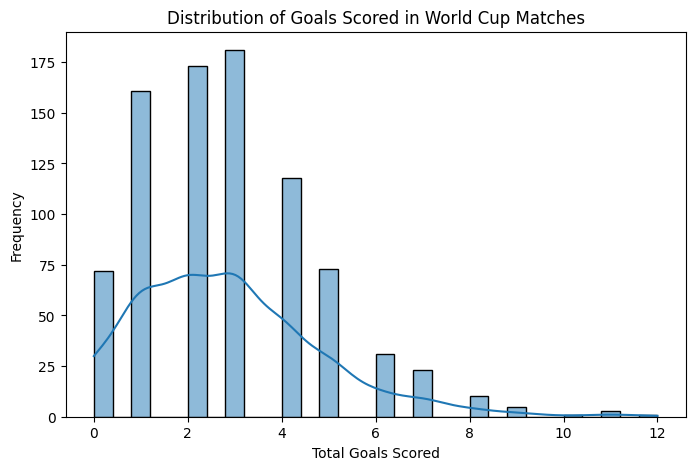

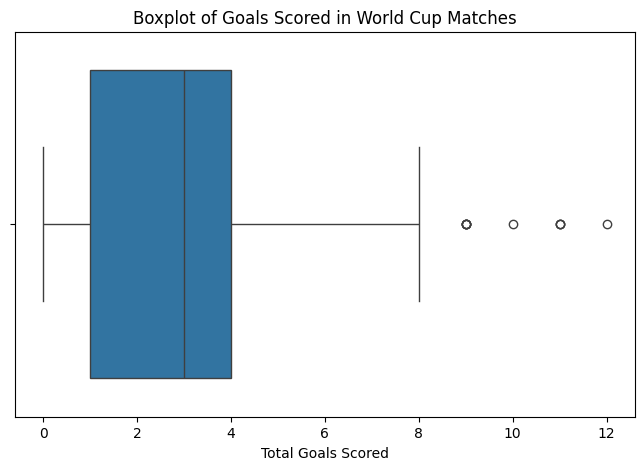

count    852.000000
mean       2.833333
std        1.954336
min        0.000000
25%        1.000000
50%        3.000000
75%        4.000000
max       12.000000
dtype: float64


In [50]:
# Histogram to visualize the distribution of goals scored in matches

plt.figure(figsize=(8,5))
sns.histplot(WorldCupMatches['HomeGoals'] + WorldCupMatches['AwayGoals'], bins=30, kde=True)
plt.title('Distribution of Goals Scored in World Cup Matches')
plt.xlabel('Total Goals Scored')
plt.ylabel('Frequency')
plt.show()

# boxplot to identify outliers in goals scored

plt.figure(figsize=(8,5))
sns.boxplot(x=WorldCupMatches['HomeGoals'] + WorldCupMatches['AwayGoals'])
plt.title('Boxplot of Goals Scored in World Cup Matches')
plt.xlabel('Total Goals Scored')
plt.show()

# Summary statistics for goals scored
goals_stats = (WorldCupMatches['HomeGoals'] + WorldCupMatches['AwayGoals']).describe()
print(goals_stats)


### **The number of matches played has increased over time (per World Cup)**

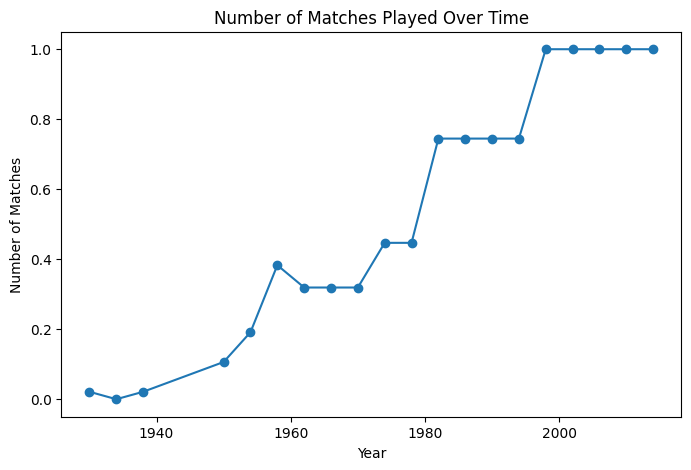

/tmp/ipython-input-1823147490.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=WorldcupSummary['Year'], y=matches_per_year, palette='viridis')


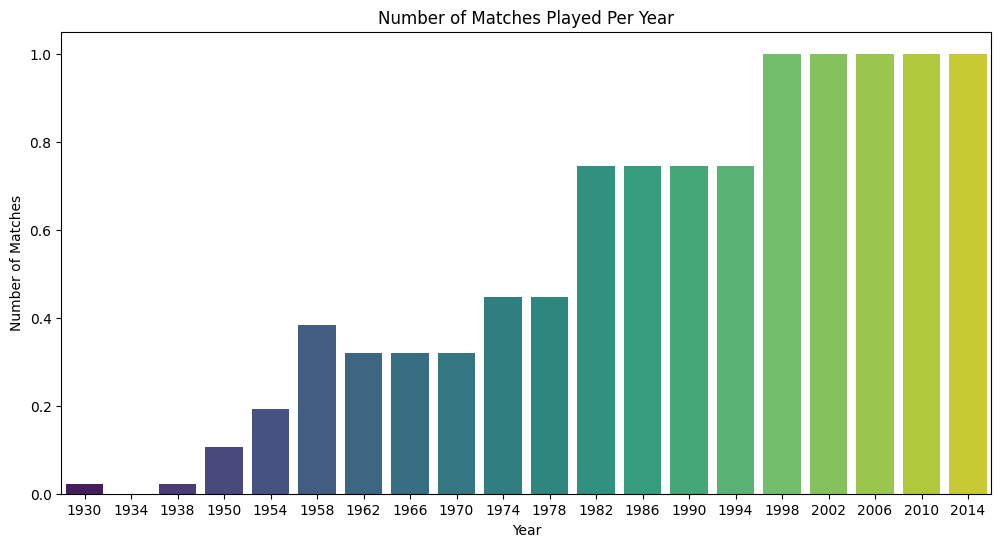

In [51]:
# Number of matches played over the years has increased over time

plt.figure(figsize=(8,5))
matches_per_year = WorldcupSummary['MatchesPlayed']
plt.plot(WorldcupSummary['Year'], matches_per_year, marker='o')
plt.title('Number of Matches Played Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()


#bar plot to show number of matches per year

plt.figure(figsize=(12,6))
sns.barplot(x=WorldcupSummary['Year'], y=matches_per_year, palette='viridis')
plt.title('Number of Matches Played Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

## **Bivariate-Level Hypotheses**

### **Home teams tend to score more goals than away teams.**

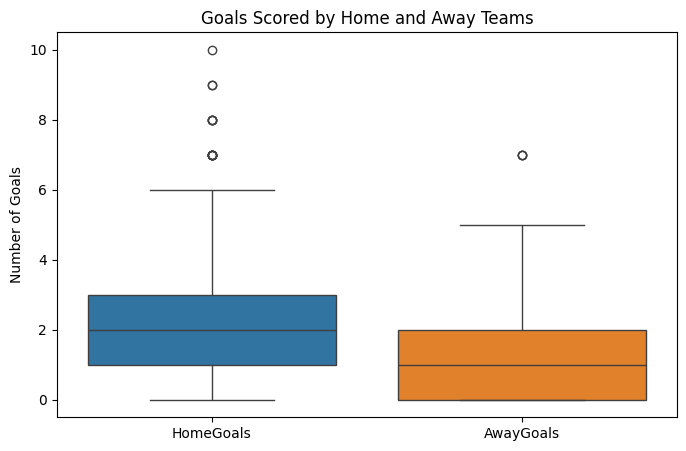

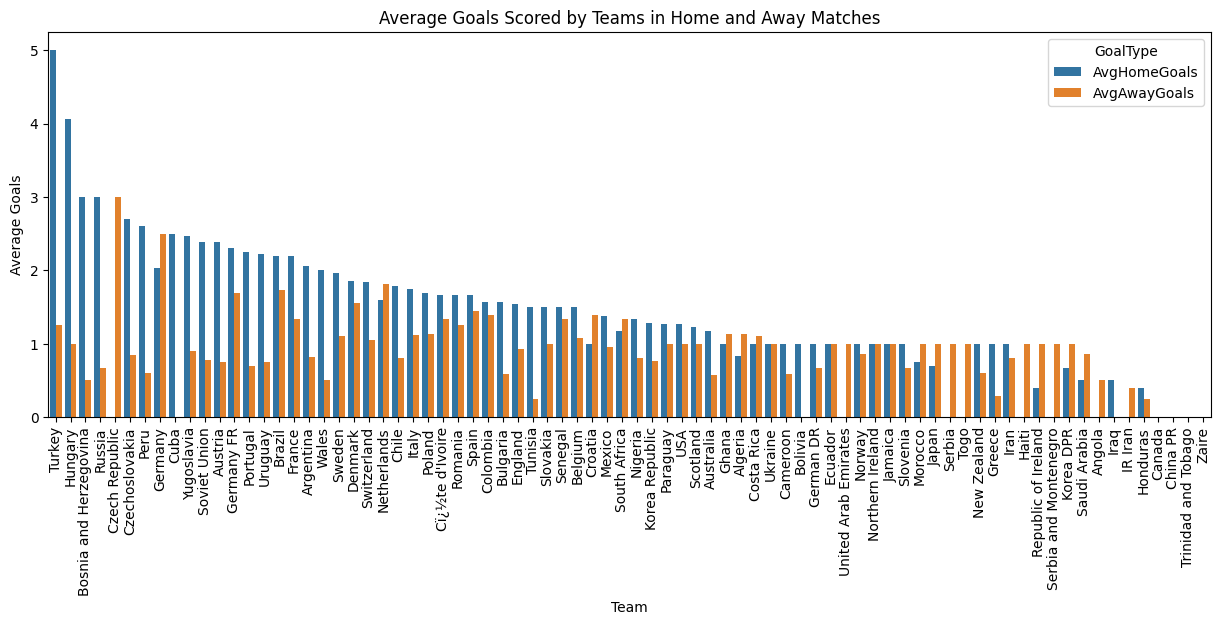

Home Goals Statistics:
 count    852.000000
mean       1.811033
std        1.610255
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: HomeGoals, dtype: float64

Away Goals Statistics:
 count    852.000000
mean       1.022300
std        1.087573
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: AwayGoals, dtype: float64


In [52]:
# Box plot

plt.figure(figsize=(8,5))
sns.boxplot(data=WorldCupMatches[['HomeGoals', 'AwayGoals']])
plt.title('Goals Scored by Home and Away Teams')
plt.ylabel('Number of Goals')
plt.show()

# Visaulization showing average goals scored by a team in home and away matches
# groupby 'HomeTeam' and 'AwayTeam' to calculate average goals

avg_home_goals = WorldCupMatches.groupby('HomeTeam')['HomeGoals'].mean().reset_index()
avg_away_goals = WorldCupMatches.groupby('AwayTeam')['AwayGoals'].mean().reset_index()

avg_home_goals.columns = ['Team', 'AvgHomeGoals']
avg_away_goals.columns = ['Team', 'AvgAwayGoals']

avg_goals = pd.merge(avg_home_goals, avg_away_goals, on='Team')
avg_goals = pd.melt(avg_goals, id_vars='Team', value_vars=['AvgHomeGoals', 'AvgAwayGoals'], var_name='GoalType', value_name='AverageGoals')

avg_goals_sorted = avg_goals.sort_values('AverageGoals', ascending = False)


plt.figure(figsize=(15,5))
sns.barplot(x='Team', y='AverageGoals', hue='GoalType', data=avg_goals_sorted )
plt.title('Average Goals Scored by Teams in Home and Away Matches')
plt.xlabel('Team')
plt.ylabel('Average Goals')
plt.xticks(rotation=90)
plt.show()


# Summary statistics for home and away goals
home_goals_stats = WorldCupMatches['HomeGoals'].describe()
away_goals_stats = WorldCupMatches['AwayGoals'].describe()
print("Home Goals Statistics:\n", home_goals_stats)
print("\nAway Goals Statistics:\n", away_goals_stats)

### **Goals per match have decreased over time due to more tactical & defensive play.**

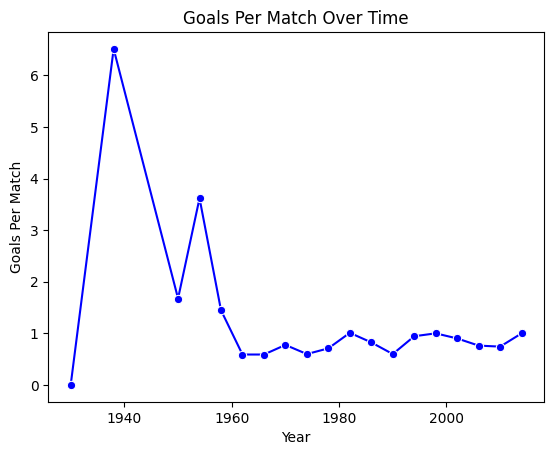

In [53]:
# plot showing goals per match decreasing with time

WorldcupSummary['GoalPerMatch'] = WorldcupSummary['GoalsScored'] / WorldcupSummary['MatchesPlayed']
sns.lineplot(x=WorldcupSummary['Year'], y=WorldcupSummary['GoalPerMatch'], marker='o', color='blue')
plt.title('Goals Per Match Over Time')
plt.xlabel('Year')
plt.ylabel('Goals Per Match')
plt.show()




## **Multivariate-Level Hypotheses**

### **Tournament year, goals scored, and attendance are interrelated — later tournaments have both higher attendance and more goals.**

<Figure size 1000x600 with 0 Axes>

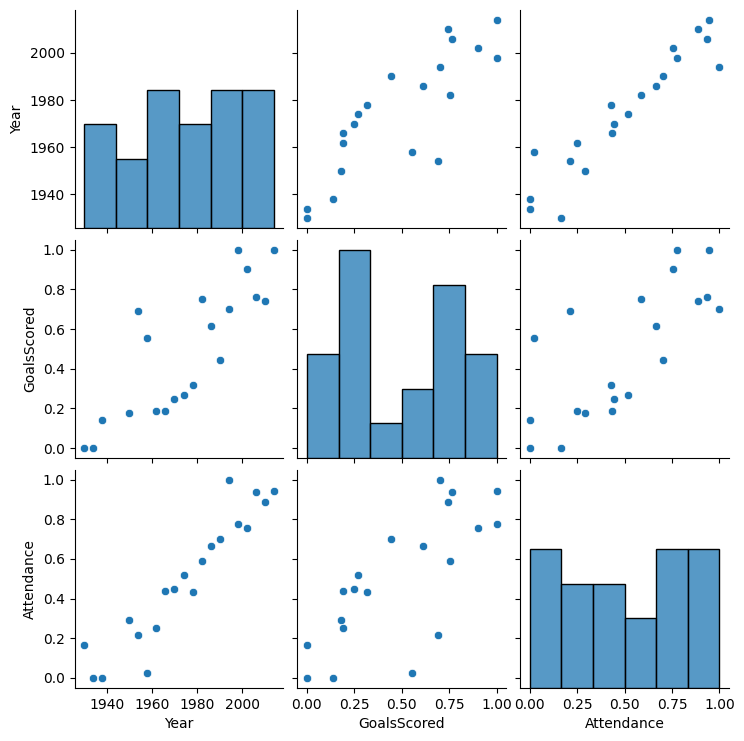

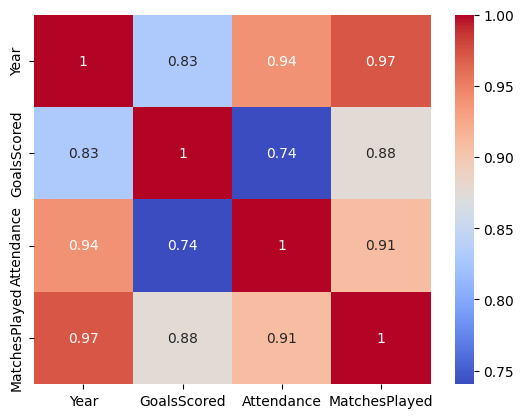

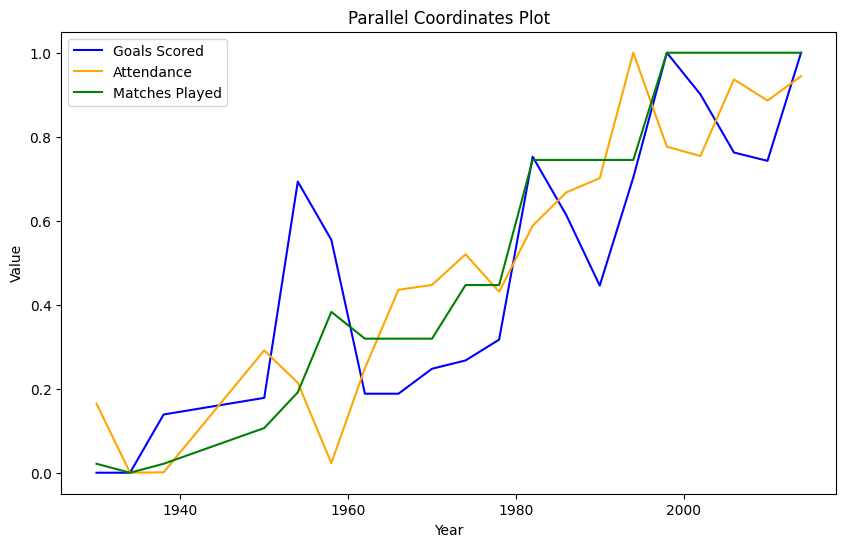

In [54]:
# Scatter plot matrix shwoing relationship between year, total, goals and attendance


plt.figure(figsize = (10, 6))
sns.pairplot(WorldcupSummary[['Year', 'GoalsScored', 'Attendance']])
plt.show()





# also identify which is goals scored which is attendance

corr = WorldcupSummary[['Year', 'GoalsScored', 'Attendance', 'MatchesPlayed']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

#Parallel Coordinates Plot
plt.figure(figsize = (10, 6))
sns.lineplot(data = WorldcupSummary, x = 'Year', y = 'GoalsScored', color = 'Blue', label = "Goals Scored")
sns.lineplot(data = WorldcupSummary, x = 'Year', y = 'Attendance', color = 'Orange', label = "Attendance")
sns.lineplot(data = WorldcupSummary, x = 'Year', y = 'MatchesPlayed', color = 'Green', label = "Matches Played")
plt.title('Parallel Coordinates Plot')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()



#### The performance of teams (HomeGoals, AwayGoals, Match Outcome) varies significantly by continent of team origin.

**Step 1: Data Preparation**

Combine necessary data from `WorldCupMatches` and `WorldCuptableauformat` and add a 'Continent' column based on the 'Team' and 'Opponent' country.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

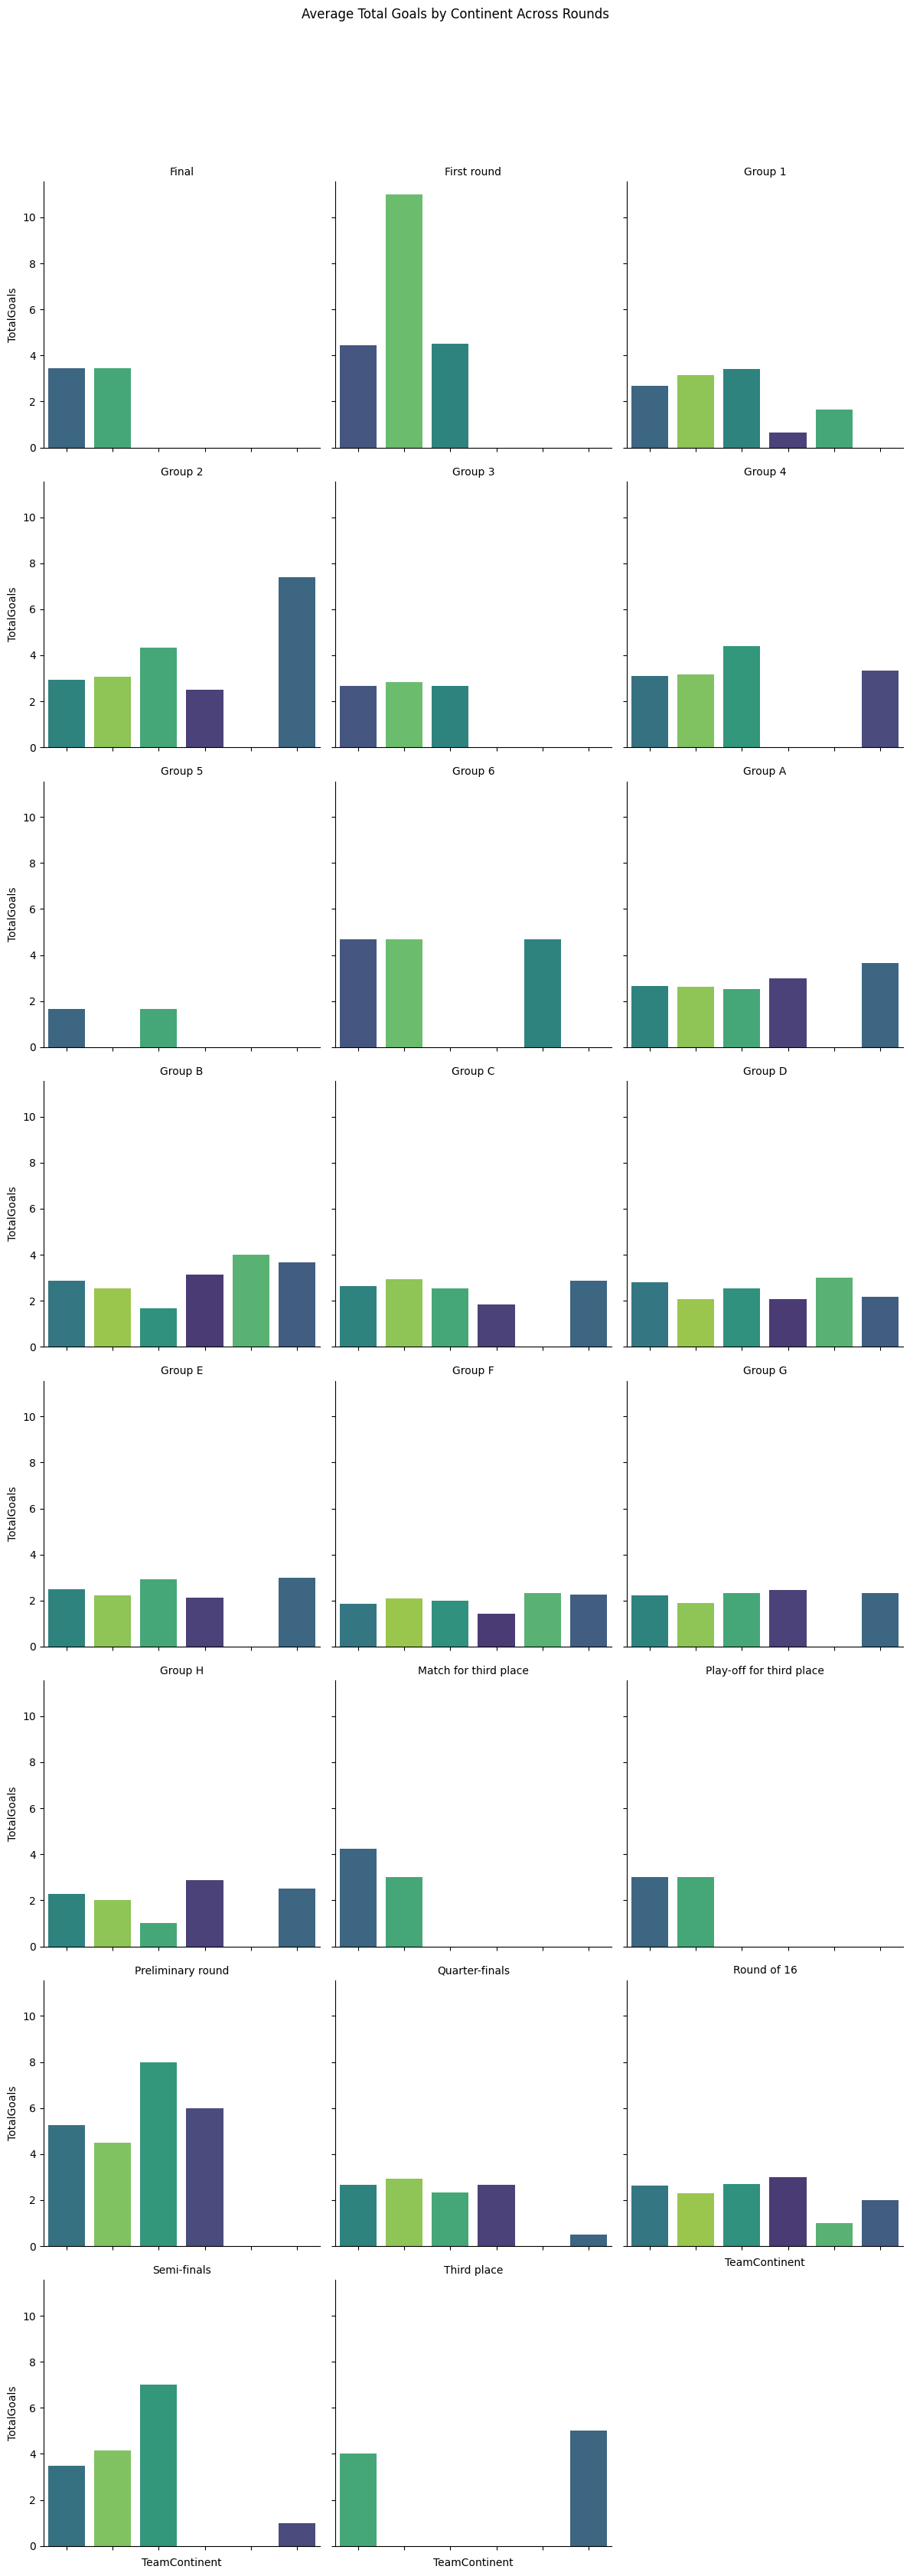

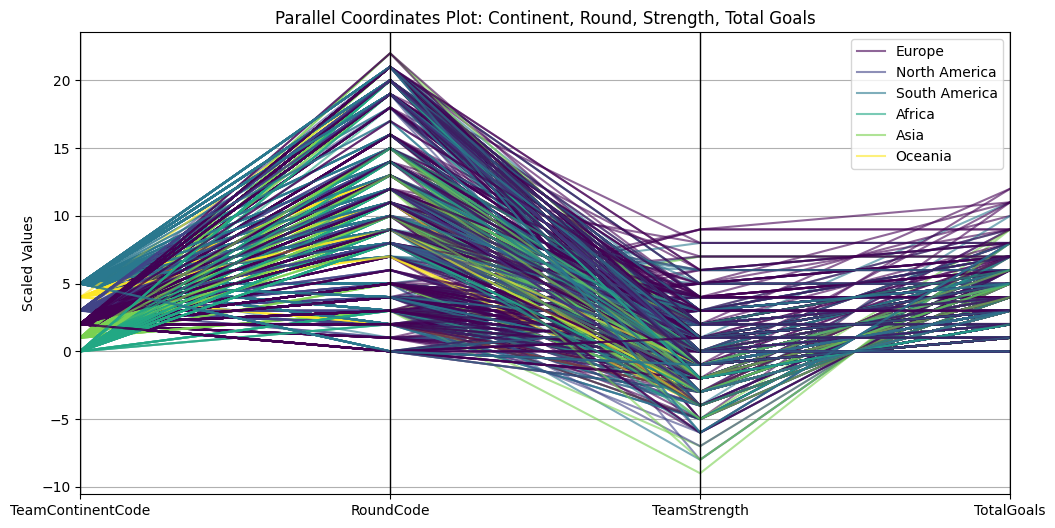

🔸 Top Round–Continent Combinations for High Scoring Matches
                Round  TeamContinent  TotalGoals
4         First round  South America   11.000000
65  Preliminary round  North America    8.000000
9             Group 2           Asia    7.400000
77        Semi-finals  North America    7.000000
10            Group 2         Europe    6.500000
69     Quarter-finals  North America    6.500000
78        Semi-finals  South America    6.181818
2         First round         Europe    6.142857
3         First round  North America    6.000000
63  Preliminary round         Africa    6.000000


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# ==========================
# 🧰 STEP 1: Data Preparation
# ==========================

# Country → Continent mapping (simplified)
country_to_continent = {
    'Uruguay': 'South America', 'Mexico': 'North America', 'Belgium': 'Europe',
    'Brazil': 'South America', 'Yugoslavia': 'Europe', 'Romania': 'Europe',
    'Peru': 'South America', 'Argentina': 'South America', 'France': 'Europe',
    'USA': 'North America', 'Chile': 'South America', 'Paraguay': 'South America',
    'Bolivia': 'South America', 'Austria': 'Europe', 'Egypt': 'Africa',
    'Switzerland': 'Europe', 'Netherlands': 'Europe', 'Germany': 'Europe',
    'Spain': 'Europe', 'Italy': 'Europe', 'Czechoslovakia': 'Europe',
    'Sweden': 'Europe', 'Hungary': 'Europe', 'Cuba': 'North America',
    'Norway': 'Europe', 'Poland': 'Europe', 'England': 'Europe',
    'Soviet Union': 'Europe', 'Portugal': 'Europe', 'Korea Republic': 'Asia',
    'North Korea': 'Asia', 'Ecuador': 'South America', 'Australia': 'Oceania',
    'New Zealand': 'Oceania', 'Trinidad and Tobago': 'North America',
    'Serbia and Montenegro': 'Europe', 'Angola': 'Africa', 'Togo': 'Africa',
    'Iran': 'Asia', 'Japan': 'Asia', 'Saudi Arabia': 'Asia',
    'Tunisia': 'Africa', 'Germany FR': 'Europe', 'DR Congo': 'Africa',
    'East Germany': 'Europe', 'Haiti': 'North America', 'IR Iran': 'Asia',
    'Côte d\'Ivoire': 'Africa', 'Ghana': 'Africa', 'Czech Republic': 'Europe',
    'Serbia': 'Europe', 'Slovakia': 'Europe', 'Bosnia and Herzegovina': 'Europe',
    'Greece': 'Europe', 'Croatia': 'Europe', 'Algeria': 'Africa',
    'Honduras': 'North America', 'Nigeria': 'Africa', 'Colombia': 'South America',
    'Costa Rica': 'North America', 'Cote d\'Ivoire': 'Africa', 'Cameroon': 'Africa',
    'Senegal': 'Africa', 'Denmark': 'Europe', 'Republic of Ireland': 'Europe',
    'Turkey': 'Asia', 'China PR': 'Asia', 'Ukraine': 'Europe', 'South Africa': 'Africa'
}

# Map continents
WorldCuptableauformat['TeamContinent'] = WorldCuptableauformat['Team'].map(country_to_continent)
WorldCuptableauformat['OpponentContinent'] = WorldCuptableauformat['Opponent'].map(country_to_continent)

# Total goals per match
WorldCuptableauformat['TotalGoals'] = WorldCuptableauformat['Team G'] + WorldCuptableauformat['Opponent G']

# Simple team strength = goal difference
WorldCuptableauformat['TeamStrength'] = WorldCuptableauformat['Team G'] - WorldCuptableauformat['Opponent G']

# Drop rows with missing continent or round to avoid plot errors
df_clean = WorldCuptableauformat.dropna(subset=['TeamContinent', 'Round'])

# =====================================
# 📊 STEP 2: FacetGrid (Trellis Plot)
# =====================================

round_continent_goals = (
    df_clean.groupby(['Round', 'TeamContinent'])['TotalGoals']
    .mean()
    .reset_index()
)

g = sns.FacetGrid(round_continent_goals, col='Round', col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.barplot, x='TeamContinent', y='TotalGoals', palette='viridis')
g.set_xticklabels(rotation=45)
g.set_titles(col_template='{col_name}')
g.fig.suptitle('Average Total Goals by Continent Across Rounds', y=1.05)
plt.tight_layout()
plt.show()

# =====================================
# 📈 STEP 3: Parallel Coordinates Plot
# =====================================

subset = df_clean[['TeamContinent', 'Round', 'TeamStrength', 'TotalGoals']].copy()
subset['TeamContinentCode'] = subset['TeamContinent'].astype('category').cat.codes
subset['RoundCode'] = subset['Round'].astype('category').cat.codes

plot_data = subset[['TeamContinentCode', 'RoundCode', 'TeamStrength', 'TotalGoals']].copy()
plot_data['Label'] = subset['TeamContinent']

plt.figure(figsize=(12,6))
parallel_coordinates(plot_data, 'Label', colormap=plt.cm.viridis, alpha=0.6)
plt.title('Parallel Coordinates Plot: Continent, Round, Strength, Total Goals')
plt.ylabel('Scaled Values')
plt.show()

# =====================================
# 📝 STEP 4: High-Scoring Summary
# =====================================

high_scoring = df_clean[df_clean['TotalGoals'] >= 4]

high_scoring_summary = (
    high_scoring.groupby(['Round', 'TeamContinent'])['TotalGoals']
    .mean()
    .reset_index()
    .sort_values(by='TotalGoals', ascending=False)
)

print("🔸 Top Round–Continent Combinations for High Scoring Matches")
print(high_scoring_summary.head(10))




---



---



#**AIRBNB DATASET**

---



---

In [56]:
airbnb = pd.read_excel("airbnb_listings.xlsx")

##**Preprocessing**

In [57]:
print(airbnb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30478 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30478 non-null  object        
 3   Neighbourhood               30478 non-null  object        
 4   Property Type               30475 non-null  object        
 5   Review Scores Rating (bin)  22155 non-null  float64       
 6   Room Type                   30478 non-null  object        
 7   Zipcode                     30344 non-null  float64       
 8   Beds                        30393 non-null  float64       
 9   Number of Records           30478 non-null  int64         
 10  Number Of Reviews           30478 non-null  int64         
 11  Price                       30478 non-null  int64     

In [58]:
#checking for null values

airbnb.isnull().sum()

,0
Host Id,0
Host Since,3
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8323
Room Type,0
Zipcode,134
Beds,85
Number of Records,0


In [59]:
#### Filling missing values

airbnb = airbnb.dropna(subset =['Host Since'])

airbnb['Property Type'] = airbnb['Property Type'].fillna(airbnb['Property Type'].mode()[0])
airbnb['Zipcode'] = airbnb['Zipcode'].fillna(airbnb['Zipcode'].mode()[0])

airbnb['Beds'] = airbnb['Beds'].fillna(airbnb['Beds'].mean())

airbnb['Review Scores Rating'] = airbnb['Review Scores Rating'].fillna(0)
airbnb['Review Scores Rating (bin)'] = airbnb['Review Scores Rating (bin)'].fillna(0)

print(airbnb.isnull().sum())
print(airbnb.info())

Host Id                       0
Host Since                    0
Name                          0
Neighbourhood                 0
Property Type                 0
Review Scores Rating (bin)    0
Room Type                     0
Zipcode                       0
Beds                          0
Number of Records             0
Number Of Reviews             0
Price                         0
Review Scores Rating          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 30475 entries, 3 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30475 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30475 non-null  object        
 3   Neighbourhood               30475 non-null  object        
 4   Property Type               30475 non-null  object        
 5   Review Scores 

In [60]:
# removing unnecessary columns 'Host Id', 'Zipcode ', 'Name'

airbnb = airbnb.drop(['Host Id', 'Zipcode', 'Name', 'Number of Records'], axis = 1)
#convert the datatype of neihbour to string
airbnb.head()


,Host Since,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Beds,Number Of Reviews,Price,Review Scores Rating
3,2008-06-26,Manhattan,Apartment,0.0,Entire home/apt,3.0,0,199,0.0
4,2008-06-26,Manhattan,Apartment,95.0,Private room,3.0,39,549,96.0
5,2008-07-25,Brooklyn,Apartment,100.0,Entire home/apt,1.0,4,149,100.0
6,2008-08-12,Manhattan,Apartment,100.0,Entire home/apt,1.0,9,250,100.0
7,2008-08-15,Brooklyn,Apartment,90.0,Private room,1.0,80,90,94.0


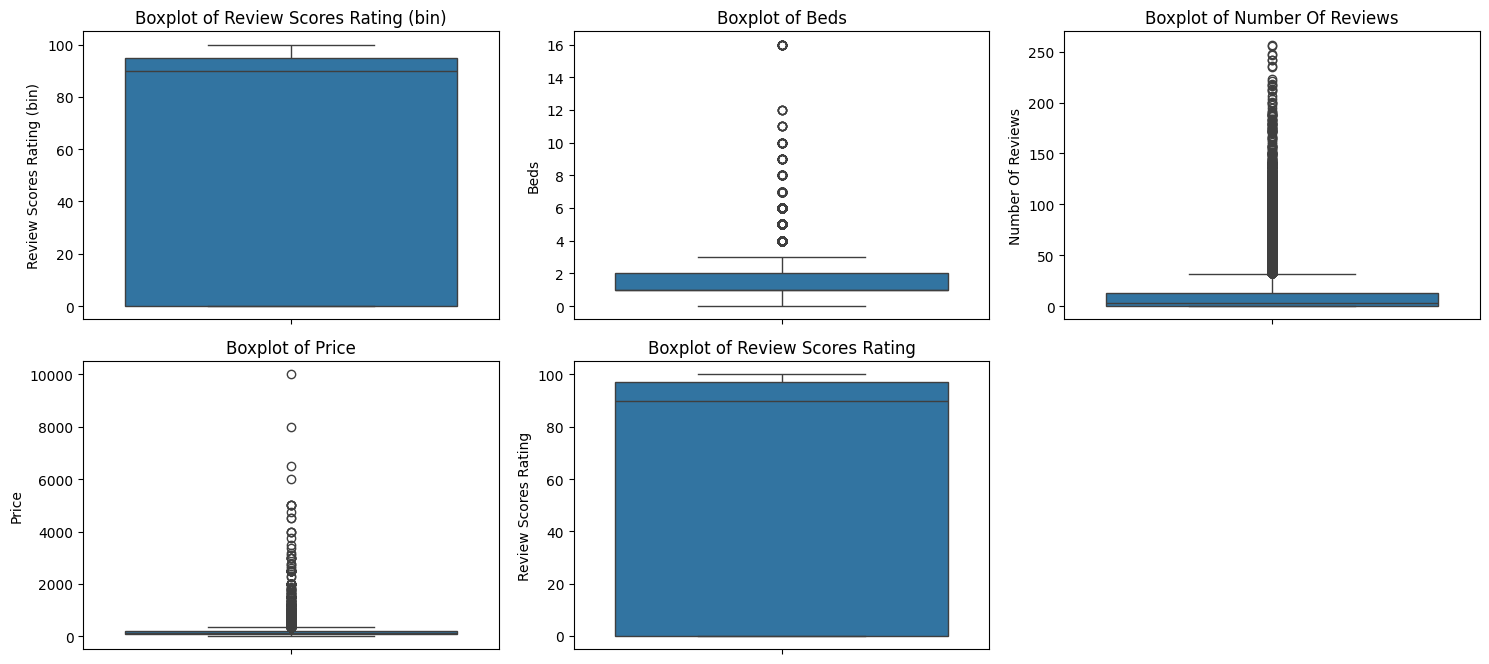

In [61]:
##check for outliers for the numeric columns

numeric_col = airbnb.select_dtypes(include = ['float64', 'int64']).columns
plt.figure(figsize = (15, 10))

for i, col in enumerate(numeric_col):
  plt.subplot(3, 3, i+1)
  sns.boxplot(airbnb[col])
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [76]:
#removing outliers of numeric columns

for col in numeric_col:
  Q1 = airbnb[col].quantile(0.25)
  Q3 = airbnb[col].quantile(0.75)
  IQR = Q3 - Q1
  print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')
  airbnb = airbnb[(airbnb[col] >= Q1 - 1.5 * IQR) & (airbnb[col] <= Q3 + 1.5 * IQR)]
  print(f'Outliers removed from {col}')

Q1: 79.0, Q3: 175.0, IQR: 96.0
Outliers removed from Price
Q1: 0.0, Q3: 98.0, IQR: 98.0
Outliers removed from Review Scores Rating
Q1: 0.0, Q3: 95.0, IQR: 95.0
Outliers removed from Review Scores Rating (bin)
Q1: 0.0, Q3: 5.0, IQR: 5.0
Outliers removed from Number Of Reviews
Q1: 1.0, Q3: 2.0, IQR: 1.0
Outliers removed from Beds


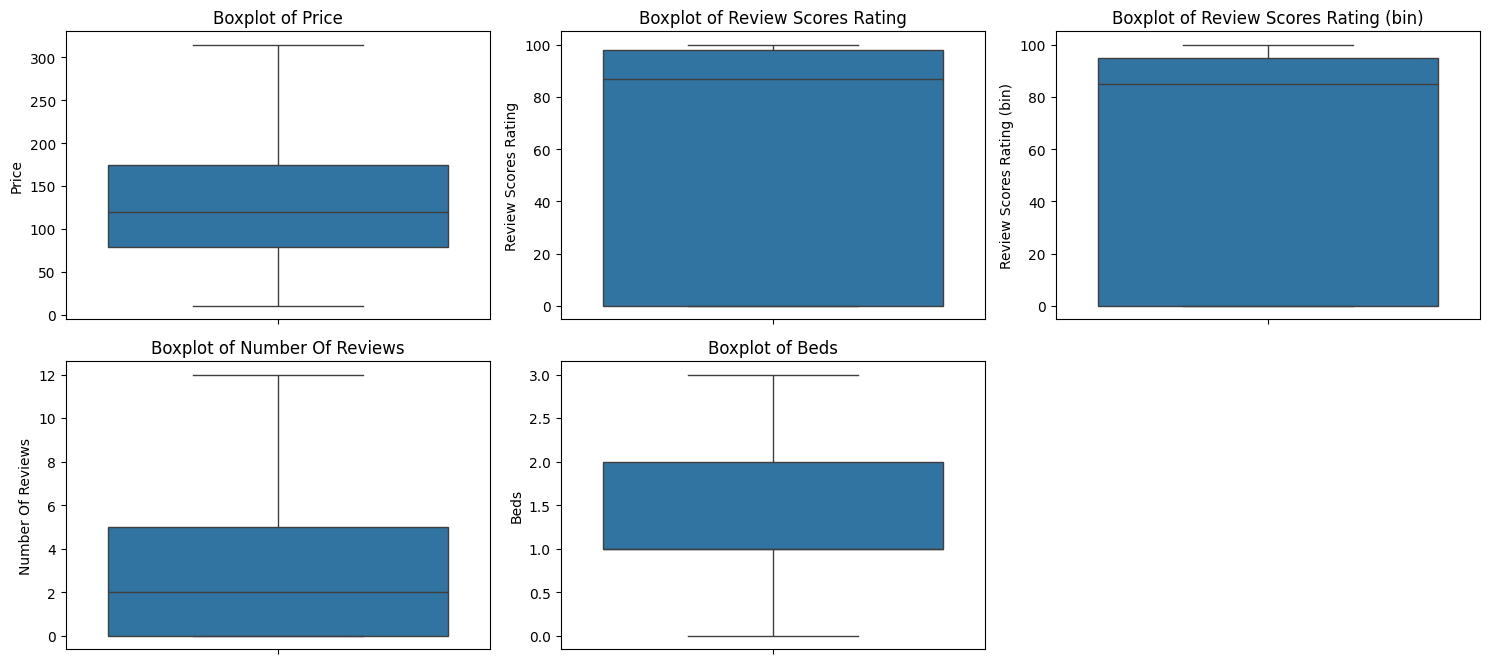

In [77]:
##check for outliers for the numeric columns


plt.figure(figsize = (15, 10))

for i, col in enumerate(numeric_col):
  plt.subplot(3, 3, i+1)
  sns.boxplot(airbnb[col])
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

##**Univariate Analysis**

 ### Airbnb prices are right-skewed, with most listings clustered at lower prices but a few extremely expensive properties.

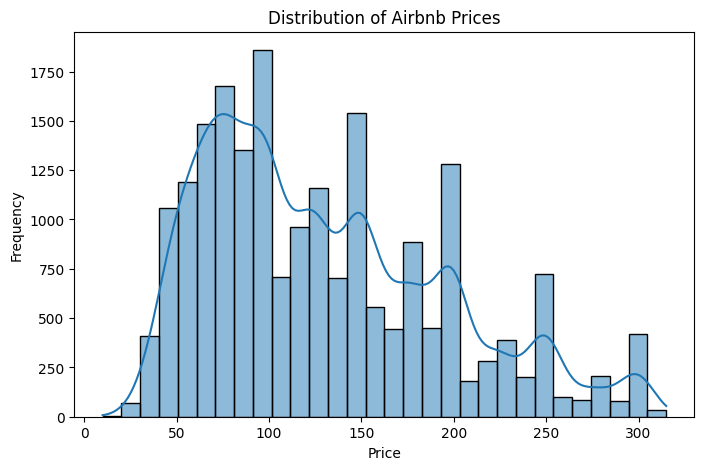

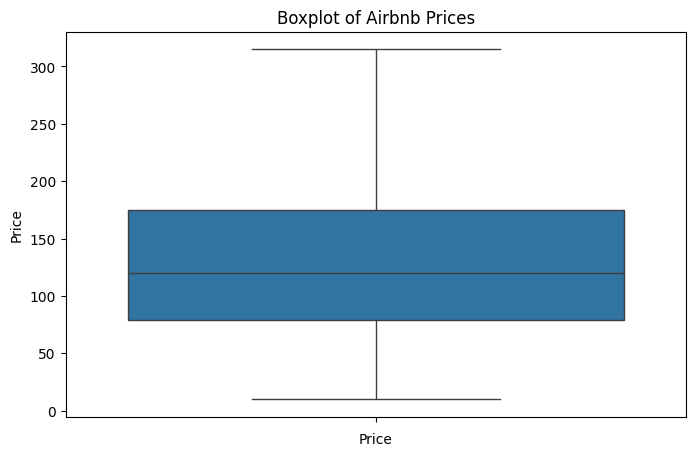

In [78]:
# Histogram Of Price Column

plt.figure(figsize = (8, 5))
sns.histplot(airbnb['Price'], bins = 30, kde = True)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#Boxplot Of Price

plt.figure(figsize = (8, 5))
sns.boxplot(airbnb['Price'])
plt.title('Boxplot of Airbnb Prices')
plt.xlabel('Price')
plt.show()

## Number of reviews follows a long-tail distribution, indicating few listings dominate the majority of reviews.

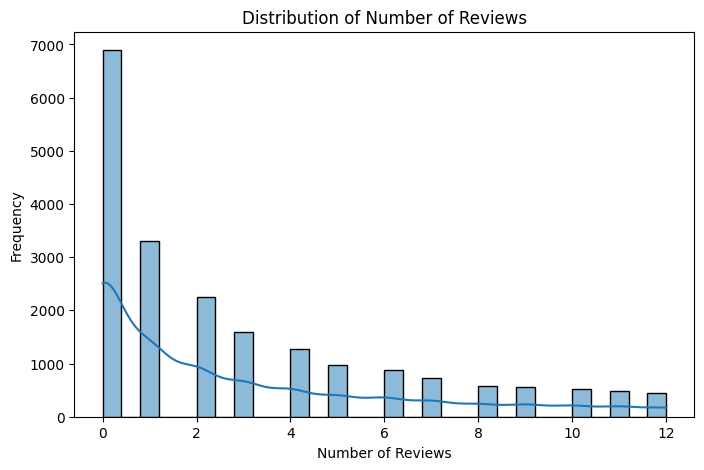

In [79]:
#Make a kde of number of reviews

plt.figure(figsize = (8, 5))
sns.histplot(airbnb['Number Of Reviews'], bins = 30, kde = True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

## **Bivariate Analysis**

### **Room type significantly affects price (e.g., entire homes are more expensive than private rooms).**

/tmp/ipython-input-1294829629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = airbnb['Room Type'], y = airbnb['Price'], palette= 'viridis')


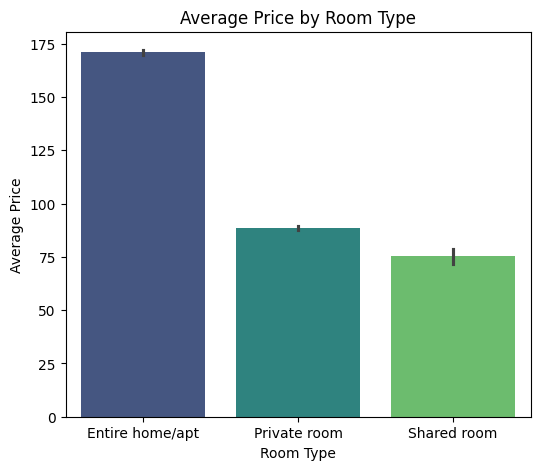

In [80]:
plt.figure(figsize = (6, 5))
sns.barplot(x = airbnb['Room Type'], y = airbnb['Price'], palette= 'viridis')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

## High number of reviews is associated with moderate price ranges (popular but affordable properties).

/tmp/ipython-input-2576620335.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = airbnb['Number Of Reviews'], y = airbnb['price_log'], palette = 'viridis')


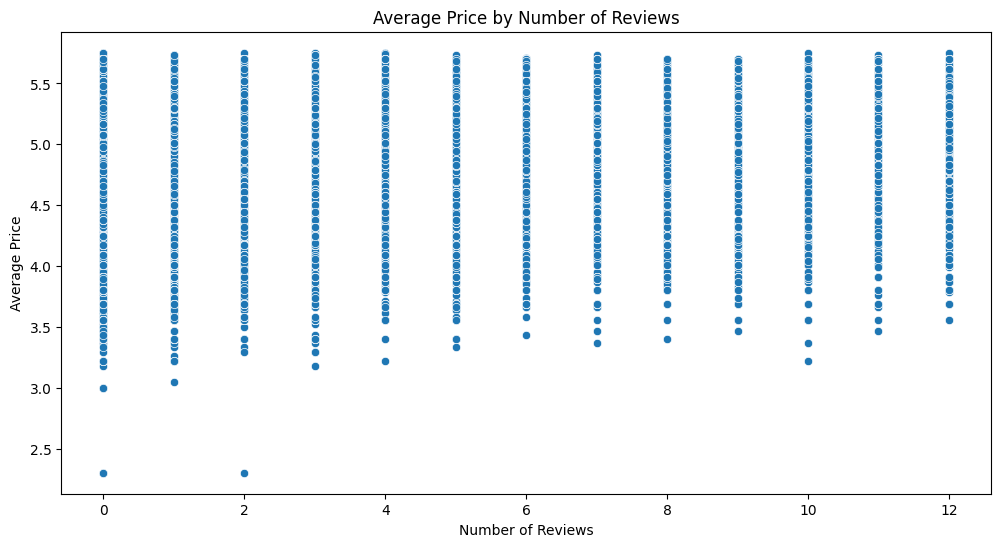

In [81]:
airbnb['price_log'] = np.log(airbnb['Price'])

plt.figure(figsize = (12, 6))
sns.scatterplot(x = airbnb['Number Of Reviews'], y = airbnb['price_log'], palette = 'viridis')
plt.title('Average Price by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Price')
plt.show()

## Correlation HeatMap

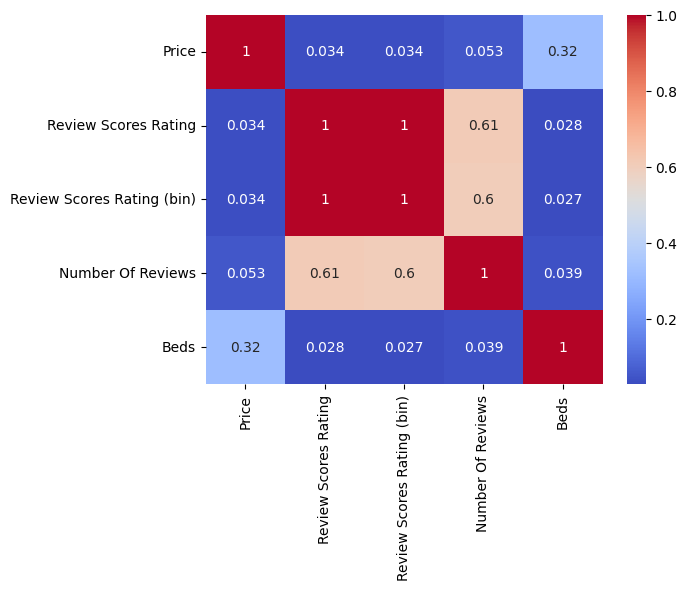

In [82]:
# correlation matrix

numeric_col = ['Price', 'Review Scores Rating', 'Review Scores Rating (bin)', 'Number Of Reviews', 'Beds']
corr = airbnb[numeric_col].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

##  Neighbourhood group influences price due to location-based demand (e.g., Manhattan vs Bronx).

/tmp/ipython-input-391875663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = airbnb['Neighbourhood '], y = airbnb['Price'], palette = 'viridis')


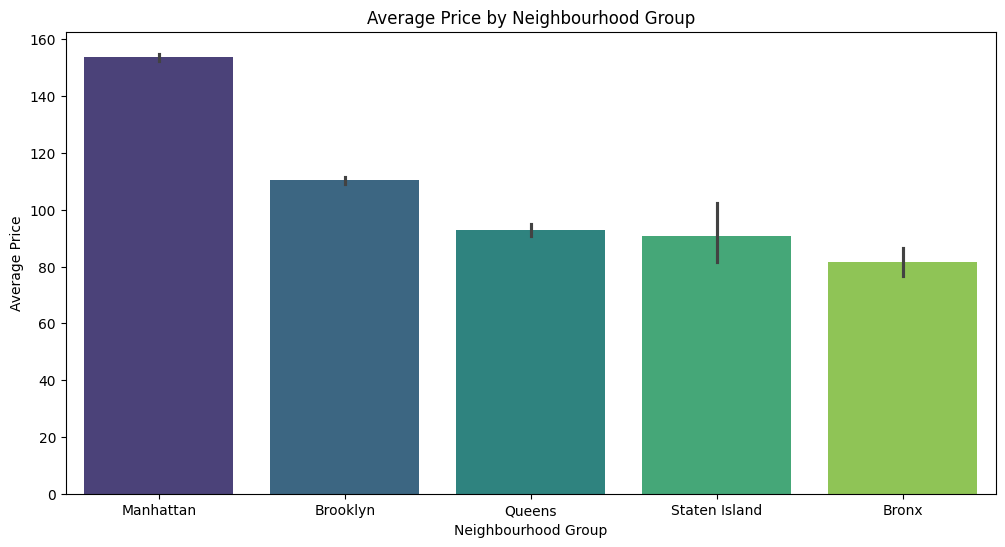

In [83]:
# Make a visalization that shows how neigbour hood effects the price

plt.figure(figsize = (12, 6))
sns.barplot(x = airbnb['Neighbourhood '], y = airbnb['Price'], palette = 'viridis')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

# Multivariate Analysis

## Property Type, Room Type, jointly influence Price

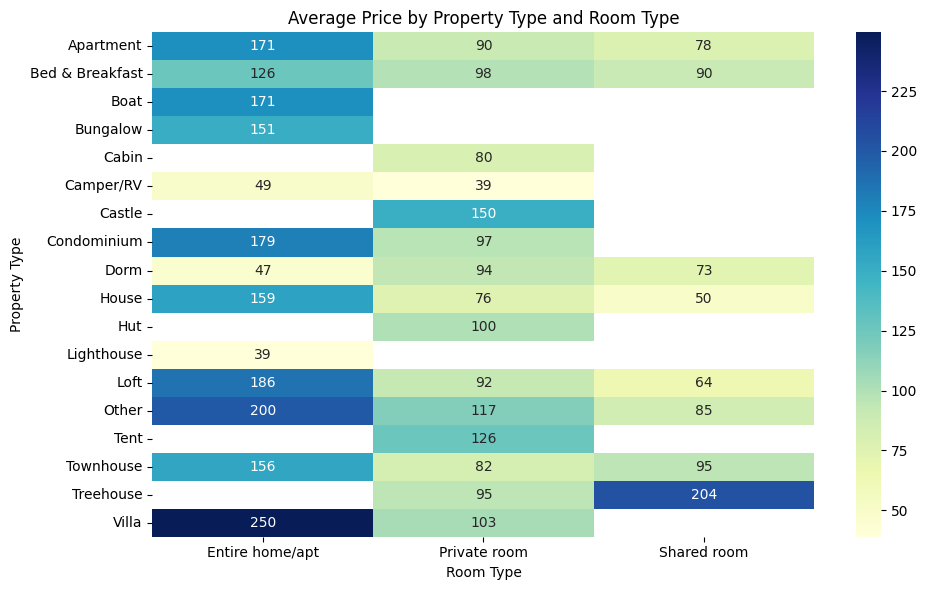

In [102]:

#Heat Map



# Create pivot table for average prices
pivot_price = airbnb.pivot_table( values='Price', index='Property Type', columns='Room Type', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_price, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Price by Property Type and Room Type')
plt.ylabel('Property Type')
plt.xlabel('Room Type')
plt.tight_layout()
plt.show()


## Hosts with longer hosting experience (‘Host Since’) have higher average review scores and charge higher prices than newer hosts

/tmp/ipython-input-848578576.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = airbnb['Host_Experience'], y = airbnb['Price'], palette = 'viridis')


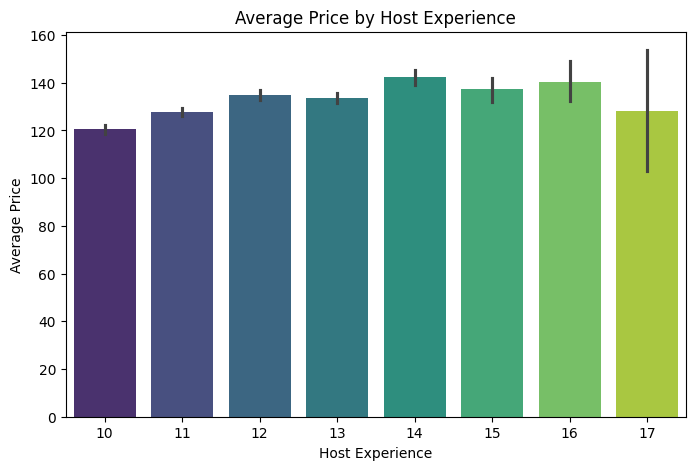

/tmp/ipython-input-848578576.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = airbnb['Host_Experience'], y = airbnb['Review Scores Rating'], palette = 'viridis')


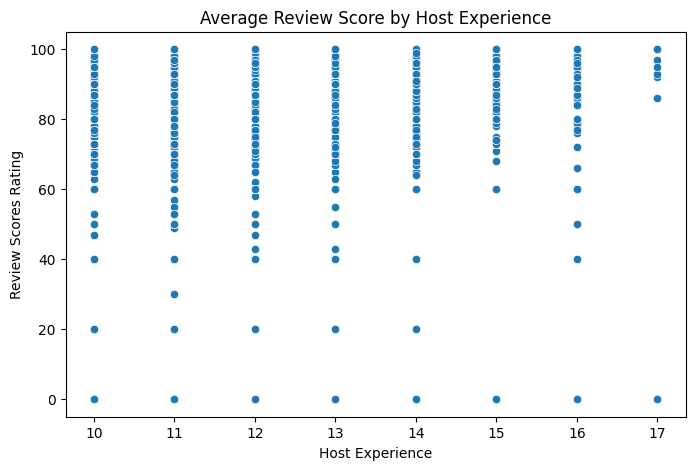

In [93]:
### Host Experience vs price and reviews

airbnb['Host_Experience'] = 2025 - (pd.to_datetime(airbnb['Host Since'])).dt.year
airbnb['Host_Experience']

#convert datatype of host experience
airbnb['Host_Experience'] = airbnb['Host_Experience'].astype(int)

#make bar plot for host with more host experience has more price


plt.figure(figsize = (8, 5))
sns.barplot(x = airbnb['Host_Experience'], y = airbnb['Price'], palette = 'viridis')
plt.title('Average Price by Host Experience')
plt.xlabel('Host Experience')
plt.ylabel('Average Price')
plt.show()

#scatter plot showing a host with more host experience has high review score

plt.figure(figsize = (8, 5))
sns.scatterplot(x = airbnb['Host_Experience'], y = airbnb['Review Scores Rating'], palette = 'viridis')
plt.title('Average Review Score by Host Experience')
plt.xlabel('Host Experience')

plt.show()

/tmp/ipython-input-3013016104.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Neighbourhood ',y='Price',hue='Room Type',data=airbnb, estimator=np.mean,ci=None, palette='viridis')


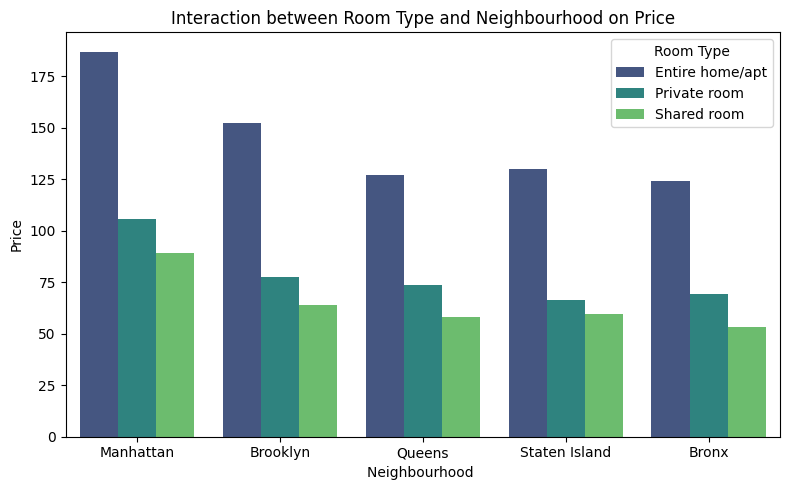

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='Neighbourhood ',y='Price',hue='Room Type',data=airbnb, estimator=np.mean,ci=None, palette='viridis')
plt.title('Interaction between Room Type and Neighbourhood on Price')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

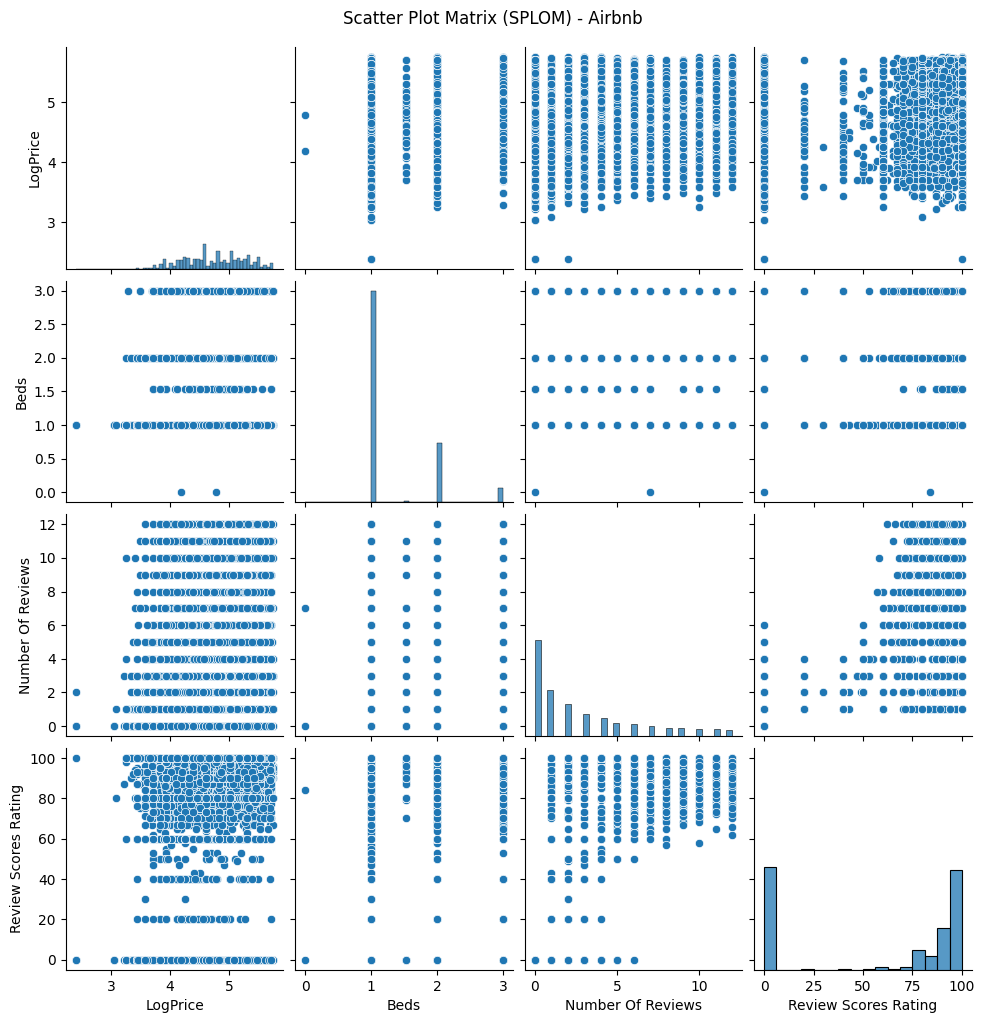

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numeric variables (with log-transformed Price)
airbnb['LogPrice'] = np.log1p(airbnb['Price'])

numeric_cols = ['LogPrice', 'Beds', 'Number Of Reviews',
                'Review Scores Rating']

# Pairplot (SPLOM)
plt.figure(figsize=(8, 5))
sns.pairplot(airbnb[numeric_cols].dropna())
plt.suptitle('Scatter Plot Matrix (SPLOM) - Airbnb', y=1.02)
plt.show()


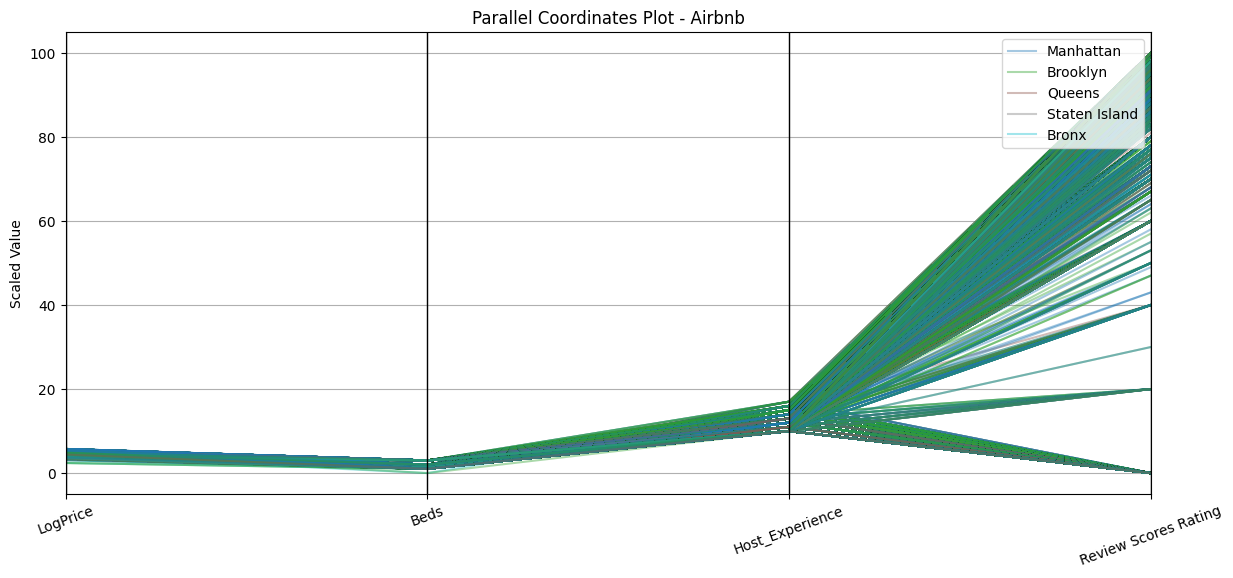

In [120]:
from pandas.plotting import parallel_coordinates

# For simplicity, pick a smaller sample to avoid clutter
subset = airbnb[['LogPrice', 'Beds', 'Host_Experience',
                 'Review Scores Rating', 'Neighbourhood ']].dropna()



plt.figure(figsize=(14,6))
parallel_coordinates(subset, class_column='Neighbourhood ', colormap='tab10', alpha=0.4)
plt.title('Parallel Coordinates Plot - Airbnb')
plt.ylabel('Scaled Value')
plt.xticks(rotation=20)
plt.show()
